In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

import warnings
warnings.simplefilter('ignore')

In [2]:
#Data collection and Analysis
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
# see the datashape
df.shape

(2000, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# see the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Studying the Data

In [8]:
df.describe().T.style.background_gradient(cmap='hot_r')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000000,3.703500,3.306063,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,2000.000000,121.182500,32.068636,0.000000,99.000000,117.000000,141.000000,199.000000
BloodPressure,2000.000000,69.145500,19.188315,0.000000,63.500000,72.000000,80.000000,122.000000
SkinThickness,2000.000000,20.935000,16.103243,0.000000,0.000000,23.000000,32.000000,110.000000
Insulin,2000.000000,80.254000,111.180534,0.000000,0.000000,40.000000,130.000000,744.000000
BMI,2000.000000,32.193000,8.149901,0.000000,27.375000,32.300000,36.800000,80.600000
DiabetesPedigreeFunction,2000.000000,0.470930,0.323553,0.078000,0.244000,0.376000,0.624000,2.420000
Age,2000.000000,33.090500,11.786423,21.000000,24.000000,29.000000,40.000000,81.000000
Outcome,2000.000000,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Check the missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.Pregnancies.describe()

count    2000.000000
mean        3.703500
std         3.306063
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        17.000000
Name: Pregnancies, dtype: float64

In [11]:

cols = df.columns
color= ['Blue',"Green","Red","Black"]

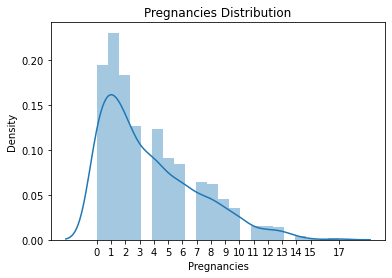

In [12]:
plt.title(f'{cols[0]} Distribution')
sns.distplot(df[cols[0]])
plt.xticks(ticks=df[cols[0]].unique())

plt.show()
# sns.distplot(df[cols[0]])

<AxesSubplot:title={'center':'Glucose Distribution'}, xlabel='Glucose', ylabel='Density'>

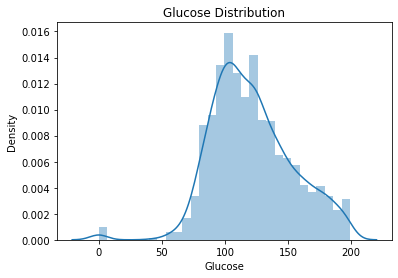

In [13]:
plt.title(f'{cols[1]} Distribution')
sns.distplot(df[cols[1]])
# sns.histplot(data=df, x=df[cols[1]])


<AxesSubplot:title={'center':'BloodPressure Distribution'}, xlabel='BloodPressure', ylabel='Count'>

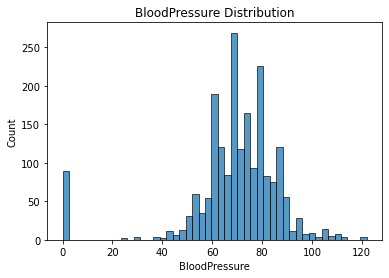

In [14]:
plt.title(f'{cols[2]} Distribution')
#sns.distplot(df[cols[2]])
sns.histplot(data=df, x=df[cols[2]])

# df[cols[2]].plot.density(color='Blue')



<AxesSubplot:title={'center':'SkinThickness Distribution'}, xlabel='SkinThickness', ylabel='Density'>

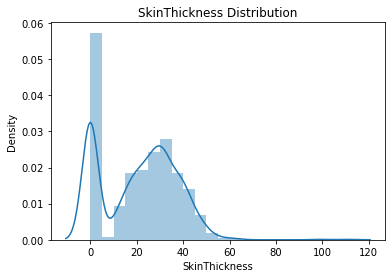

In [15]:
plt.title(f'{cols[3]} Distribution')
sns.distplot(df[cols[3]])
# sns.histplot(data=df, x=df[cols[3]])
#df[cols[3]].plot.density(color='Blue')


<AxesSubplot:title={'center':'Insulin Distribution'}, xlabel='Insulin', ylabel='Density'>

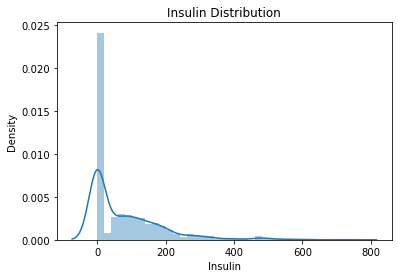

In [16]:
plt.title(f'{cols[4]} Distribution')
sns.distplot(df[cols[4]])
# sns.histplot(data=df, x=df[cols[4]])
# df[cols[4]].plot.density(color='Blue')



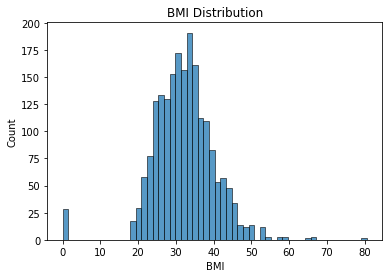

In [17]:
plt.title(f'{cols[5]} Distribution')
#sns.distplot(df[cols[5]])
sns.histplot(data=df, x=df[cols[5]])
#df[cols[5]].plot.density(color='r')
plt.show()

<AxesSubplot:title={'center':'DiabetesPedigreeFunction Distribution'}, xlabel='DiabetesPedigreeFunction', ylabel='Density'>

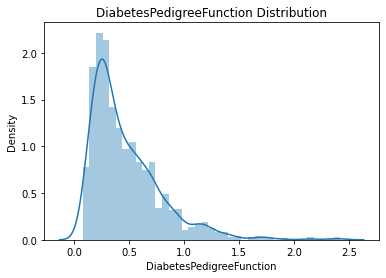

In [18]:
plt.title(f'{cols[6]} Distribution')
sns.distplot(df[cols[6]])
# sns.histplot(data=df, x=df[cols[6]])
#df[cols[6]].plot.density(color='g')

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Density'>

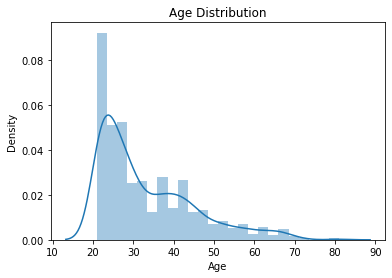

In [19]:
plt.title(f'{cols[7]} Distribution')
sns.distplot(df[cols[7]])
# sns.histplot(data=df, x=df[cols[7]])
# df[cols[7]].plot.density(color='Blue')


<AxesSubplot:xlabel='Age', ylabel='count'>

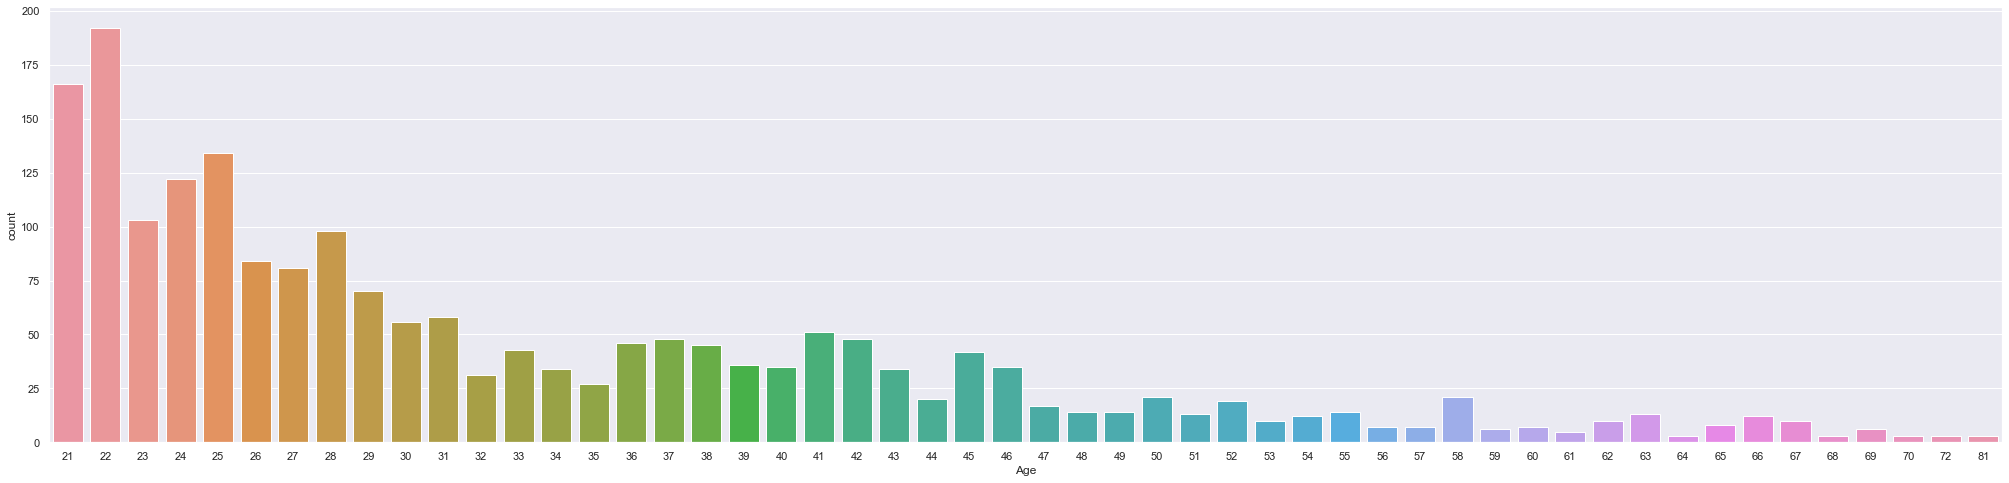

In [20]:
plt.figure(figsize=(35,8))
sns.set_theme(style="darkgrid")
sns.countplot(df['Age'])

In [21]:
df.Age.describe()

count    2000.000000
mean       33.090500
std        11.786423
min        21.000000
25%        24.000000
50%        29.000000
75%        40.000000
max        81.000000
Name: Age, dtype: float64

# Observations

* The dataset contains more younger people.
*The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity.
*Majority of People having insuling less than 200
*Majority of people having Skinthickness between 20-40
*Majority of People having BP between 60-80

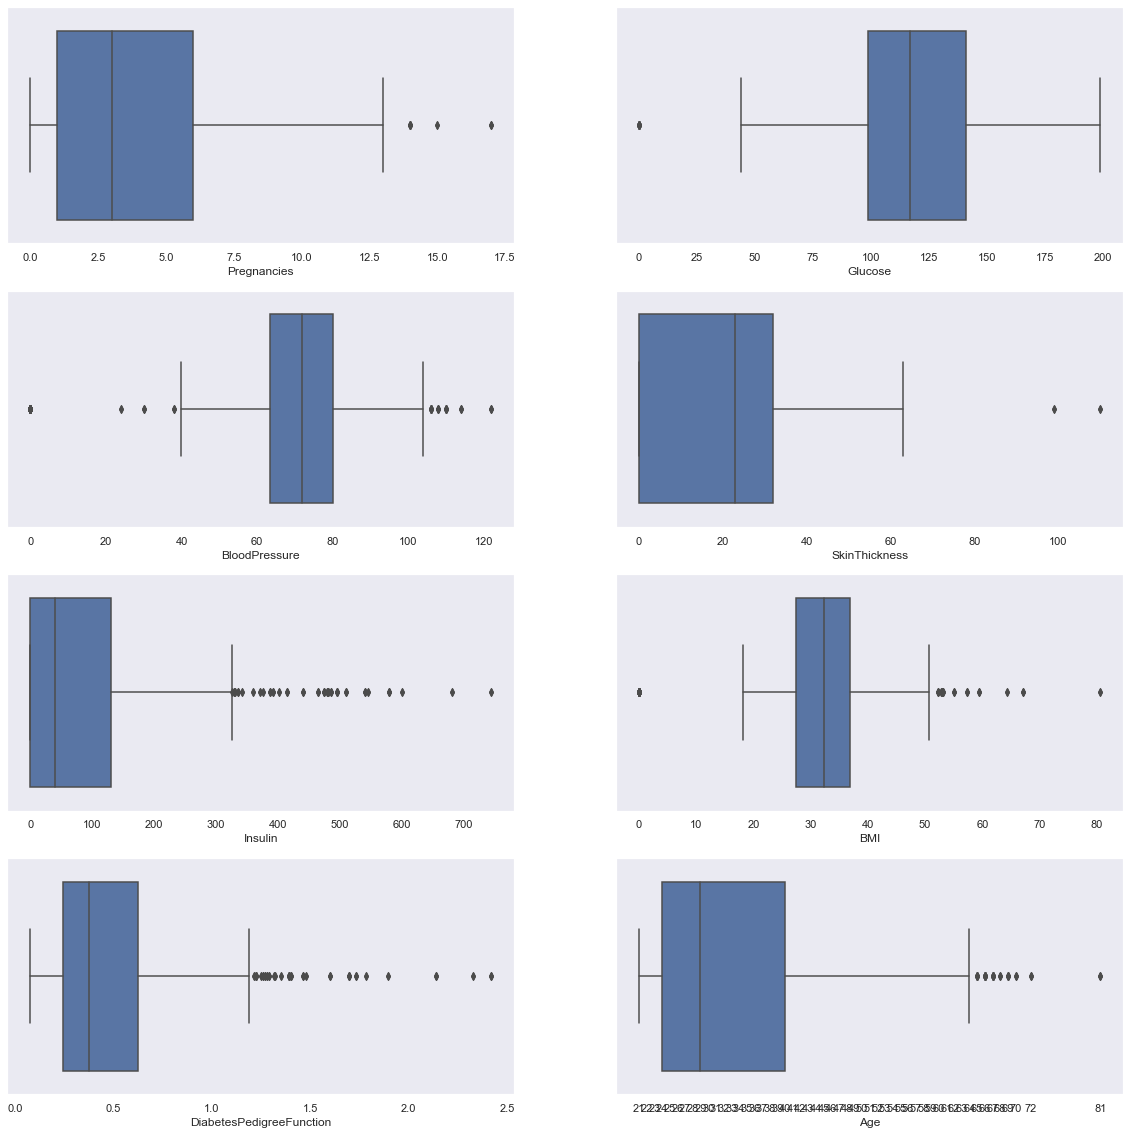

In [22]:
sns.set_theme(style='dark')
fig, axes = plt.subplots(4,2,figsize=(20,20))
i = 0     # row
j = 0     # column
for col in cols[:-1]:
    sns.boxplot(x=df[col],ax=axes[i][j])
    plt.xticks(ticks=df[col].unique())
    
    j = j + 1
    
    if j >= 2:
        j = 0
        if i < 3:
            i = i + 1

In [23]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [24]:
def detect_outliers(column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    
    return df[column][(df[column]<(Q1-1.5*IQR)) | (df[column]>(Q3+1.5*IQR))]


    


In [25]:
def replace_outlier_with_mean(column,outliers):
    df[column]=np.where(df[column].isin(outliers),df[column].mean(),df[column])
    return df[column]

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
Pregnancies_outliers=detect_outliers(cols[0])
Glucose_outliers = detect_outliers(cols[1])
BloodPressure_outliers = detect_outliers(cols[2])
SkinThickness_outliers=detect_outliers(cols[3])
Insulin_outliers=detect_outliers(cols[4])
BMI_outliers = detect_outliers(cols[5])
DiabetesPedigreeFunction_outliers = detect_outliers(cols[6])
Age_outliers=detect_outliers(cols[7])
Outcome_outliers=detect_outliers(cols[8])


outliers=[Pregnancies_outliers,
         Glucose_outliers,
         BloodPressure_outliers,
         SkinThickness_outliers,
         Insulin_outliers,
         BMI_outliers,
         DiabetesPedigreeFunction_outliers,
         Age_outliers,
         Outcome_outliers]

In [28]:
for i, col in enumerate(cols[:]):
    df[col] = replace_outlier_with_mean(col,outliers[i])


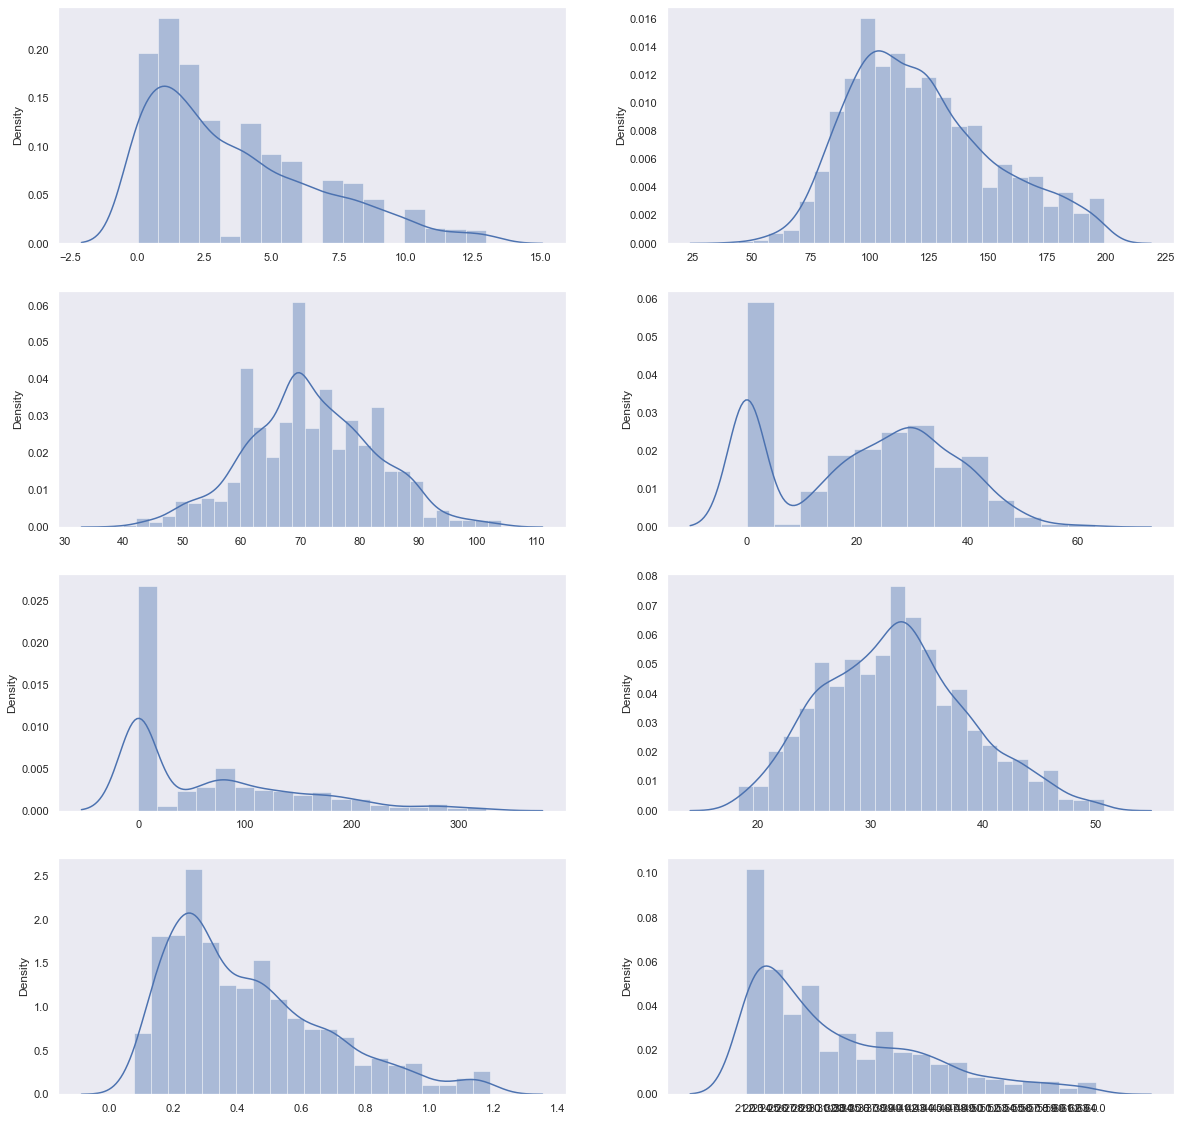

In [29]:
def make_figures():
    fig, axes = plt.subplots(4,2,figsize=(20,20))
    i = 0
    j = 0
    for col in cols[:-1]:
        sns.distplot(x=df[col],ax=axes[i][j])
        plt.xticks(ticks=df[col].unique())
    
        j = j + 1
    
        if j >= 2:
            j = 0
            if i < 3:
                i = i + 1
        
        
make_figures()

In [31]:
df.describe().T.style.background_gradient('BuGn')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000000,3.636221,3.187675,0.000000,1.000000,3.000000,6.000000,13.000000
Glucose,2000.000000,121.970186,30.533180,44.000000,99.000000,118.000000,141.000000,199.000000
BloodPressure,2000.000000,71.855094,10.809541,40.000000,64.000000,71.000000,78.000000,104.000000
SkinThickness,2000.000000,20.767870,15.660548,0.000000,0.000000,23.000000,32.000000,63.000000
Insulin,2000.000000,66.325271,80.676115,0.000000,0.000000,40.000000,115.000000,325.000000
BMI,2000.000000,32.274754,6.427564,18.200000,27.600000,32.193000,36.400000,50.700000
DiabetesPedigreeFunction,2000.000000,0.435139,0.248726,0.078000,0.244000,0.376000,0.583000,1.191000
Age,2000.000000,32.250172,10.412693,21.000000,24.000000,29.000000,39.000000,64.000000
Outcome,2000.000000,0.342000,0.474498,0.000000,0.000000,0.000000,1.000000,1.000000


Having Diebetics:	 684
Not_Having Diebetics:	 1316
Having Diebetese petions: 0.342 %
not Having Diebetese petions: 0.66 %


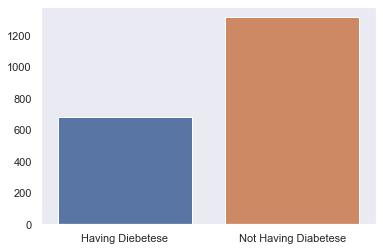

In [32]:
having_diabetese=df[df['Outcome']==1]
not_having_diabetese=df[df['Outcome']==0]

print('Having Diebetics:\t',str(len(having_diabetese)))
print('Not_Having Diebetics:\t',str(len(not_having_diabetese)))


sns.barplot(x=['Having Diebetese','Not Having Diabetese'],y=[len(having_diabetese),
                                                           len(not_having_diabetese)])

print('Having Diebetese petions:',str(round(len(having_diabetese)/len(df),3)),'%')
print('not Having Diebetese petions:',str(round(len(not_having_diabetese)/len(df),2)),'%')

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

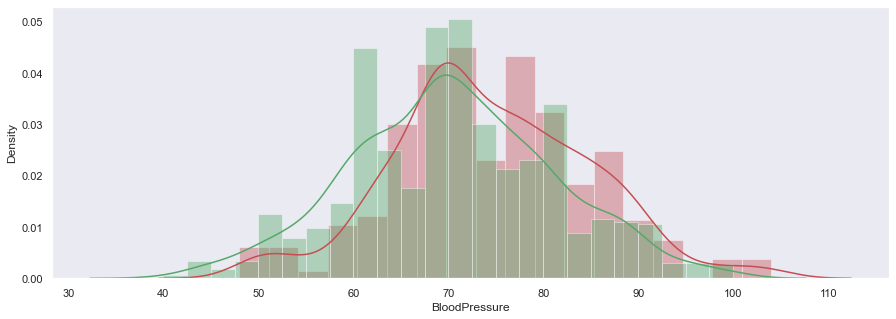

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['Outcome']==1]['BloodPressure'],color='r')
sns.distplot(df[df['Outcome']==0]['BloodPressure'],color='g')

<AxesSubplot:xlabel='Age', ylabel='Density'>

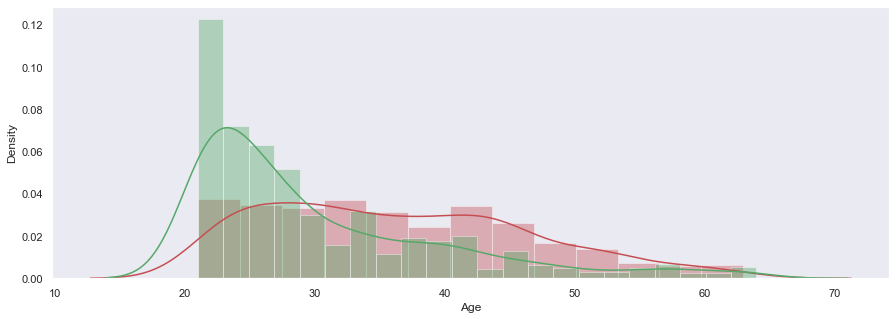

In [35]:
plt.figure(figsize=(15,5))

sns.distplot(df[df['Outcome']==1]['Age'],color='r')
sns.distplot(df[df['Outcome']==0]['Age'],color='g')

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

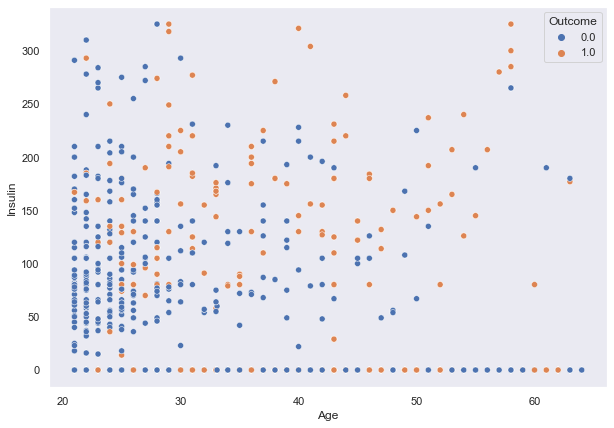

In [36]:
plt.figure(figsize=(10,7))

sns.scatterplot(df['Age'],df['Insulin'],hue=df['Outcome'],color='r')


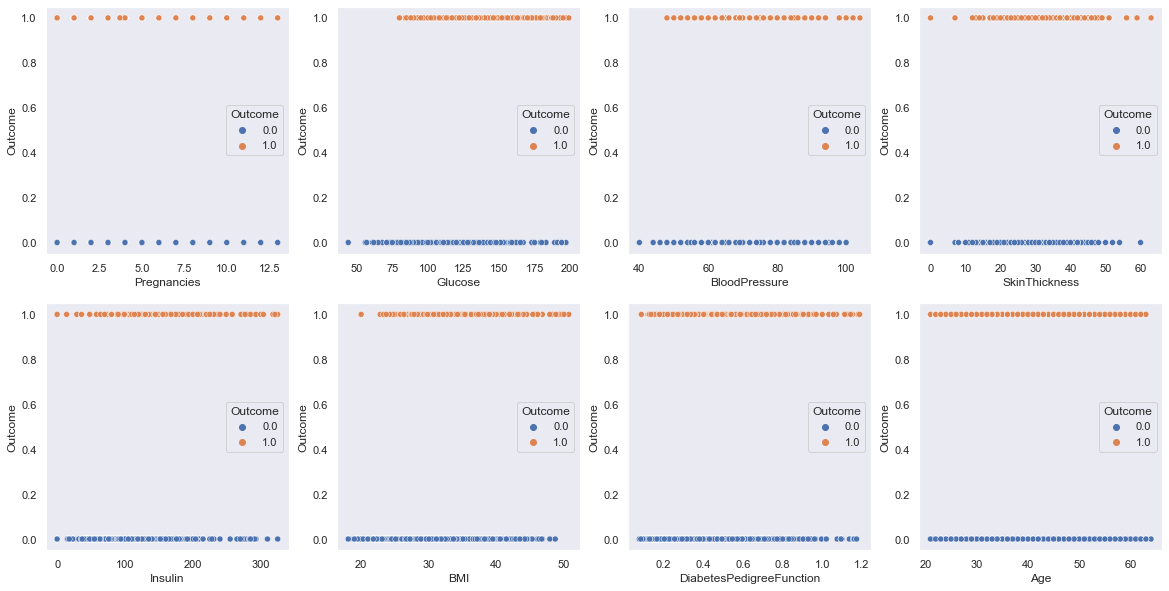

In [37]:
fig,axes=plt.subplots(2,4, figsize=(20,10))
l=0  # Row
m=0  # column
for i in cols[:-1]:
    sns.scatterplot(x=df[i],y='Outcome',data=df,hue='Outcome',ax=axes[l][m])
    m+=1
    if m==4:
        m=0
        if l<3:
            l+=1
        



In [ ]:
#df['Insulin']=df['Insulin'].apply(lambda x: str(x).replace('0','0'))

<AxesSubplot:>

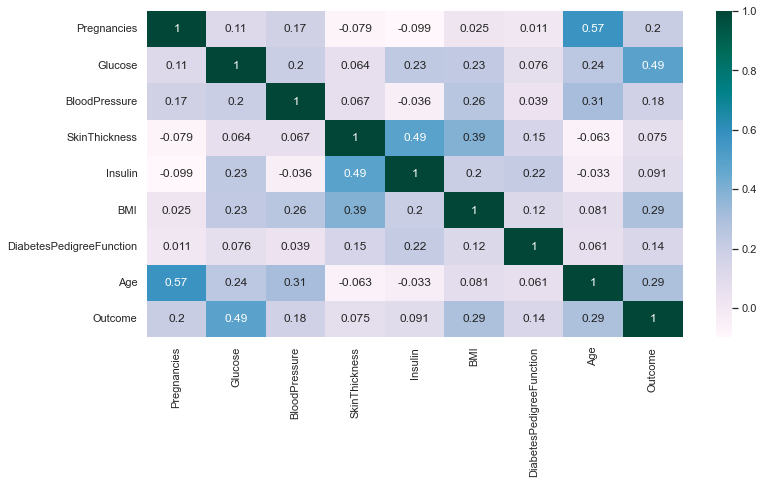

In [39]:
plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='PuBuGn')



In [40]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [42]:
#X=sc.fit_transform(X)

In [43]:
df2=pd.DataFrame(X)
new_df=df2.rename(columns={0:'Pregnancies',1:'Glucose',2:'BloodPressure',
                           3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',
                          7:'Age',8:'Outcome'})
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0000,35.0,0.000,33.600,0.127,47.0
1,0.0,84.0,82.0000,31.0,125.000,38.200,0.233,23.0
2,0.0,145.0,69.1455,0.0,0.000,44.200,0.630,31.0
3,0.0,135.0,68.0000,42.0,250.000,42.300,0.365,24.0
4,1.0,139.0,62.0000,41.0,80.254,40.700,0.536,21.0
...,...,...,...,...,...,...,...,...
1995,2.0,75.0,64.0000,24.0,55.000,29.700,0.370,33.0
1996,8.0,179.0,72.0000,42.0,130.000,32.700,0.719,36.0
1997,6.0,85.0,78.0000,0.0,0.000,31.200,0.382,42.0
1998,0.0,129.0,69.1455,46.0,130.000,32.193,0.319,26.0


In [44]:
y.values

array([1., 0., 1., ..., 0., 1., 0.])

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [46]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (1600, 8)
X_test (400, 8)


In [47]:
print('y_train',y_train.shape)
print('y_test',y_test.shape)

y_train (1600,)
y_test (400,)


In [48]:
X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.transform(X_test)

# Logistic Regression model

In [49]:
model = LogisticRegression(max_iter=200,fit_intercept=True)


In [50]:
model.fit(X_train_scale,y_train)

LogisticRegression(max_iter=200)

In [51]:
model.intercept_

array([-0.88439996])

In [52]:
model.coef_

array([[ 0.26042551,  1.05858013, -0.04975652, -0.06051353, -0.108231  ,
         0.57164744,  0.24207738,  0.32655988]])

In [53]:
model.classes_

array([0., 1.])

In [54]:
# Prediction on our model

y_pred=model.predict(X_test_scale)

<AxesSubplot:>

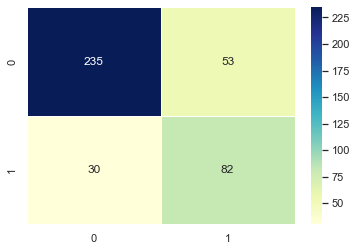

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="YlGnBu",linewidths=0.5,)


In [56]:
correct_predictions = (conf_mat[0][0] + conf_mat[1][1])
incorrect_predictions = (conf_mat[0][1] + conf_mat[1][0])
print("Correctly Predicted:\t" + str(correct_predictions))
print("Incorrectly Predicted:\t" + str(incorrect_predictions))
print("Correctness Score Percentage:\t" + str(round(correct_predictions/np.sum(conf_mat),2)*100) + " %")
print("Incorrect Ptediction:",str(round(incorrect_predictions)/np.sum(conf_mat)*100)+'%')

Correctly Predicted:	317
Incorrectly Predicted:	83
Correctness Score Percentage:	79.0 %
Incorrect Ptediction: 20.75%


In [57]:
def calculate_precision(tp,fp):
    return tp/tp+fp

In [58]:
def calculate_recall(tp,fn):
    return tp/tp+fn

In [59]:
def calculte_f1score(precision,recall):
    return 2 * precision * recall/(precision + recall)

In [60]:
def calculate_specificity(tn,fp):
    return tn/tn+fp

In [61]:
# Model evlauation

# KNeighbors algorithm

In [62]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [63]:
knn_pred=knn.predict(X_test_scale)


# KNN model Evaluation

<AxesSubplot:>

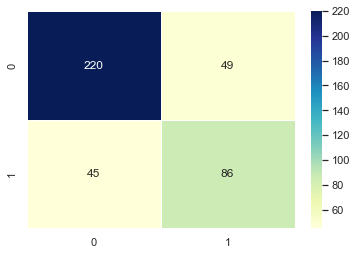

In [64]:
# Confusion Matrix

knn_conf_mat=confusion_matrix(knn_pred,y_test)
sns.heatmap(knn_conf_mat,annot=True,fmt='d',cmap="YlGnBu",linewidths=0.5)


In [65]:
correct_predictions = (conf_mat[0][0] + conf_mat[1][1])
incorrect_predictions = (conf_mat[0][1] + conf_mat[1][0])
print("Correctly Predicted:\t" + str(correct_predictions))
print("Incorrectly Predicted:\t" + str(incorrect_predictions))
print("Correctness Score Percentage:\t" + str(round(correct_predictions/np.sum(conf_mat),2)*100) + " %")
print("Incorrect Ptediction:",str(round(incorrect_predictions)/np.sum(conf_mat)*100)+'%')

Correctly Predicted:	317
Incorrectly Predicted:	83
Correctness Score Percentage:	79.0 %
Incorrect Ptediction: 20.75%


In [66]:
print('classification report',classification_report(knn_pred,y_test))

classification report               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       269
         1.0       0.64      0.66      0.65       131

    accuracy                           0.77       400
   macro avg       0.73      0.74      0.74       400
weighted avg       0.77      0.77      0.77       400



# DecisionTree Classifier algorithm

In [67]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1)

In [68]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [69]:
tree_pred=dt.predict(X_test)
tree_pred

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0.

In [70]:
y_test

1565    0.0
774     0.0
1666    0.0
1711    0.0
1146    1.0
       ... 
901     0.0
1918    0.0
1947    0.0
993     0.0
76      0.0
Name: Outcome, Length: 400, dtype: float64

In [71]:
print('accuracy_score',accuracy_score(y_test,tree_pred)*100)

accuracy_score 78.0


# Model Evaluation

<AxesSubplot:>

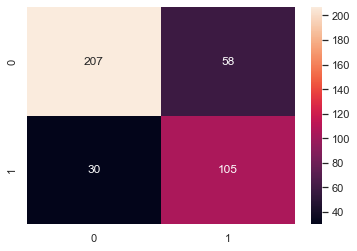

In [72]:
tree_conf_mat=confusion_matrix(y_test, tree_pred)
sns.heatmap(tree_conf_mat,annot=True,fmt='d')

In [73]:
print('classification report',classification_report(tree_pred,y_test))

classification report               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       237
         1.0       0.78      0.64      0.70       163

    accuracy                           0.78       400
   macro avg       0.78      0.76      0.76       400
weighted avg       0.78      0.78      0.78       400



# RandomForest Classifier

In [74]:
rfc=RandomForestClassifier(n_estimators=100)

In [75]:
rfc.fit(X_train_scale,y_train)

RandomForestClassifier()

In [76]:
forest_pred=rfc.predict(X_test_scale)

<AxesSubplot:>

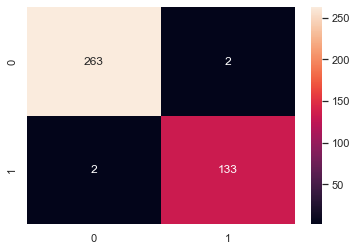

In [77]:
forest_conf_mat=confusion_matrix(forest_pred,y_test)
sns.heatmap(forest_conf_mat,annot=True,fmt='d')

In [78]:
print('classification report',classification_report(forest_pred,y_test))

classification report               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       265
         1.0       0.99      0.99      0.99       135

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# Select Vector Machine

In [79]:
svc=SVC()

In [80]:
svc.fit(X_train_scale,y_train)

SVC()

In [81]:
svm_pred=svc.predict(X_test_scale)

In [82]:
svc_cm=confusion_matrix(svm_pred,y_test)

In [83]:
print('accuracy score',accuracy_score(svm_pred,y_test))

accuracy score 0.835


In [84]:
# model evaluation

<AxesSubplot:>

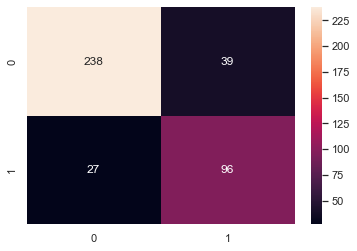

In [85]:
svm_conf_mat=confusion_matrix(svm_pred,y_test)
sns.heatmap(svm_conf_mat,annot=True,fmt='d')

In [86]:
print('classification_report',classification_report(svm_pred,y_test))

classification_report               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       277
         1.0       0.71      0.78      0.74       123

    accuracy                           0.83       400
   macro avg       0.80      0.82      0.81       400
weighted avg       0.84      0.83      0.84       400



In [87]:
nbias=GaussianNB()
nbias.fit(X_train_scale,y_train)

GaussianNB()

In [88]:
nbias_pred=nbias.predict(X_test_scale)

In [89]:
print('accuracy_score',accuracy_score(nbias_pred,y_test)*100)

accuracy_score 76.75


# NaviaBias Algorithm

<AxesSubplot:>

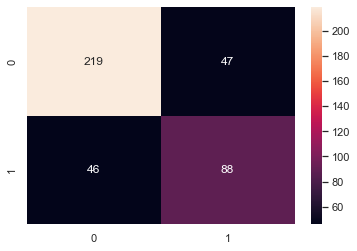

In [90]:
nbias_cm=confusion_matrix(nbias_pred,y_test)
sns.heatmap(nbias_cm,annot=True,fmt='d')

In [91]:
correct_prediction_nbis=(nbias_cm[1][1]+nbias_cm[0][0])
incorrect_predictions_nbis=((nbias_cm[0][1]+nbias_cm[1][0]))
print('correct_prediction:',correct_prediction_nbis)
print('incorrect_prediction:',incorrect_predictions_nbis)

# Average
print('Correct Score Percentage',str(round(correct_prediction_nbis/np.sum(nbias_cm),2)*100)+ '%')
print("Incorrect Score Percentage:\t" + str(round(incorrect_predictions_nbis/np.sum(nbias_cm),2)*100) + " %")


correct_prediction: 307
incorrect_prediction: 93
Correct Score Percentage 77.0%
Incorrect Score Percentage:	23.0 %


In [92]:
print('clssreport',classification_report(nbias_pred,y_test))

clssreport               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       266
         1.0       0.65      0.66      0.65       134

    accuracy                           0.77       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.77      0.77      0.77       400



# Gradient Boosting Classifier

In [93]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scale,y_train)

GradientBoostingClassifier()

In [94]:
gbc_pred=GBC.predict(X_test_scale)

In [95]:
print('accuracy_score',accuracy_score(nbias_pred,y_test))

accuracy_score 0.7675


In [96]:

gbc_conf_mat = confusion_matrix(y_test, gbc_pred)
gbc_conf_mat

array([[242,  23],
       [ 24, 111]], dtype=int64)

In [97]:
print('accuracy_score',accuracy_score(gbc_pred,y_test)*100)

accuracy_score 88.25


In [98]:
score_df = pd.DataFrame()
score_df['Model'] = pd.Series(['Logistic Regression','KNN','DecisionTrees','RandomForest',
                               'SVM','GradientBoostingClassifier'])
score_df['Recall'] = pd.Series([calculate_recall(conf_mat[0][0],conf_mat[0][1]),
                               calculate_recall(knn_conf_mat[0][0],knn_conf_mat[0][1]),
                               calculate_recall(tree_conf_mat[0][0],tree_conf_mat[0][1]),
                                calculate_recall(forest_conf_mat[0][0],forest_conf_mat[0][1]),
                                calculate_recall(svm_conf_mat[0][0],svm_conf_mat[0][1]),
                                calculate_recall(gbc_conf_mat[0][0],gbc_conf_mat[0][1]),
                               ])
score_df["Precision"] = pd.Series([
                           calculate_precision(conf_mat[0][0],conf_mat[1][0]), 
                            calculate_precision(knn_conf_mat[0][0],knn_conf_mat[1][0]), 
                            calculate_precision(tree_conf_mat[0][0],tree_conf_mat[1][0]), 
                            calculate_precision(forest_conf_mat[0][0],forest_conf_mat[1][0]), 
                            calculate_precision(svm_conf_mat[0][0],svm_conf_mat[1][0]), 
                            calculate_precision(gbc_conf_mat[0][0],gbc_conf_mat[1][0]), 
])


score_df['F1 Score'] = calculte_f1score(score_df['Precision'],score_df['Recall'])
score_df['Specificity Score'] = pd.Series([
                        calculate_specificity(conf_mat[1][1],conf_mat[1][0]),
                        calculate_specificity(knn_conf_mat[1][1],knn_conf_mat[1][0]),
                        calculate_specificity(tree_conf_mat[1][1],tree_conf_mat[1][0]),
                        calculate_specificity(forest_conf_mat[1][1],forest_conf_mat[1][0]),
                        calculate_specificity(svm_conf_mat[1][1],svm_conf_mat[1][0]),
                        calculate_specificity(gbc_conf_mat[1][1],gbc_conf_mat[1][0])
])

score_df['Accuracy'] = pd.Series([
    accuracy_score(y_test,y_pred)*100,
    accuracy_score(y_test,knn_pred)*100,
    accuracy_score(y_test,tree_pred)*100,
    accuracy_score(y_test,forest_pred)*100,
    accuracy_score(y_test,svm_pred)*100,
    accuracy_score(y_test,gbc_pred)*100
    
])


In [99]:
score_df


,Model,Recall,Precision,F1 Score,Specificity Score,Accuracy
0,Logistic Regression,54.0,31.0,39.388235,31.0,79.25
1,KNN,50.0,46.0,47.916667,46.0,76.50
2,DecisionTrees,59.0,31.0,40.644444,31.0,78.00
3,RandomForest,3.0,3.0,3.000000,3.0,99.00
4,SVM,40.0,28.0,32.941176,28.0,83.50
5,GradientBoostingClassifier,24.0,25.0,24.489796,25.0,88.25


<AxesSubplot:>

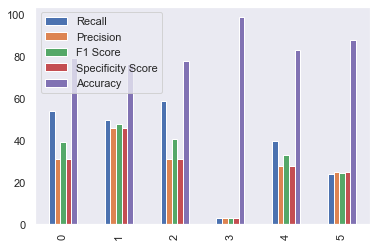

In [104]:
score_df.plot(kind='bar')